In [20]:
# download category_encoders

!#pip install category_encoders

'#pip' is not recognized as an internal or external command,
operable program or batch file.


In [21]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('Set3')

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

import scipy.stats

plt.rcParams["font.family"] = "NanumBarunGothic"

from category_encoders.target_encoder import TargetEncoder

In [22]:
# data load
# pip install openpyxl
path = "C:/프로젝트/k-d/2-Project/주제/data"
# main = pd.read_excel(path + '/국립중앙도서관 대출 데이터/NL_CO_LOAN_PUB_202311-7.xlsx')
Top_Lib = pd.read_excel(path + '/국립중앙도서관 인기대출/국립중앙도서관 인기대출+주제+판매량+별점.xlsx')



num_rows, num_columns = Top_Lib.shape

# 결과 출력
print(f"데이터 수: {num_rows}")

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

데이터 수: 154064


### 데이터 파악

In [23]:
# information
Top_Lib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154064 entries, 0 to 154063
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   일련번호       154064 non-null  int64         
 1   순위수        154064 non-null  int64         
 2   입력일자       154064 non-null  datetime64[ns]
 3   ISBN13번호   154064 non-null  int64         
 4   서적제목명      154064 non-null  object        
 5   저작자명       154059 non-null  object        
 6   출판사명       153533 non-null  object        
 7   발행일자       153640 non-null  object        
 8   서적마스터일련번호  154064 non-null  int64         
 9   KDC명       154064 non-null  float64       
 10  KDC 대분류    154064 non-null  object        
 11  KDC 소분류    154064 non-null  object        
 12  대출수        154064 non-null  int64         
 13  분석기간코드     154064 non-null  object        
 14  분석기간코드명    154064 non-null  object        
 15  분석유형코드     154064 non-null  int64         
 16  분석유형코드명    154064 no

<Axes: >

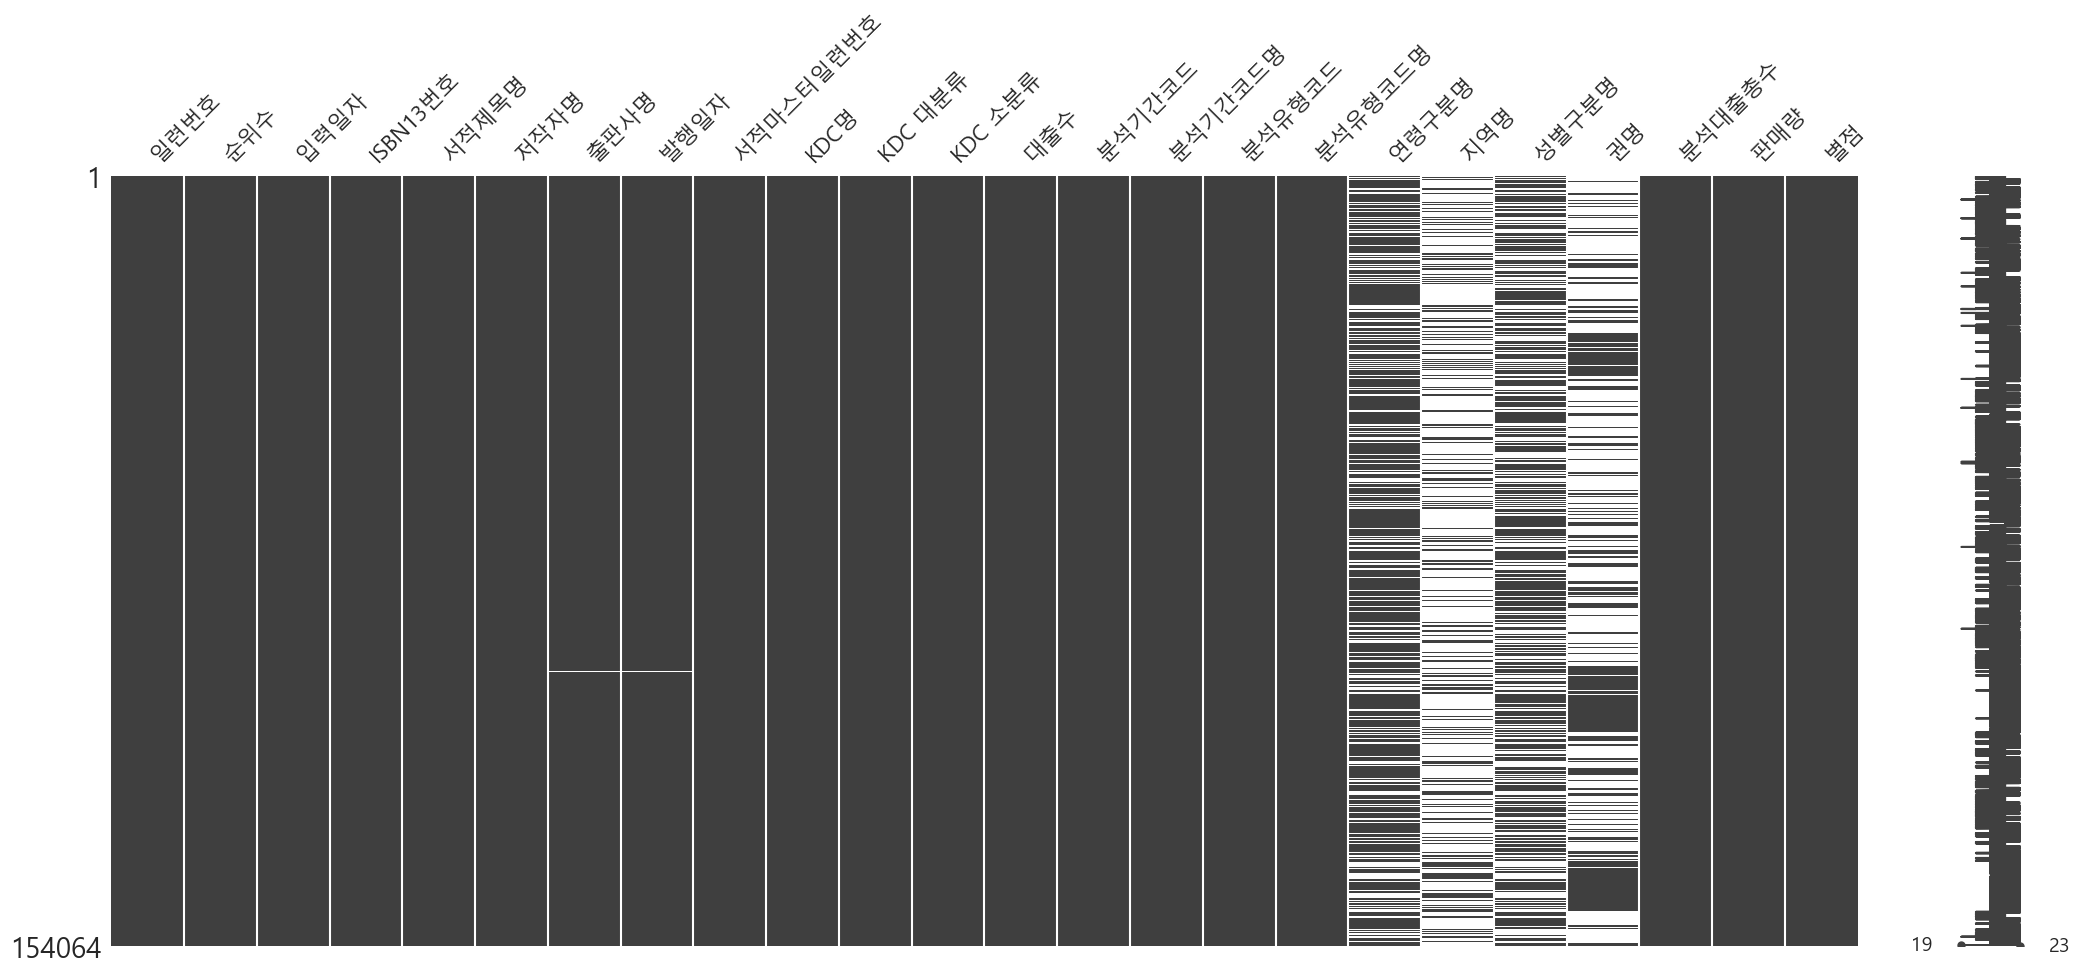

In [24]:
# 결측치 확인
msno.matrix(Top_Lib)

### 간단한 EDA

#### 분석 전 전처리

#### 간단한 데이터 분석

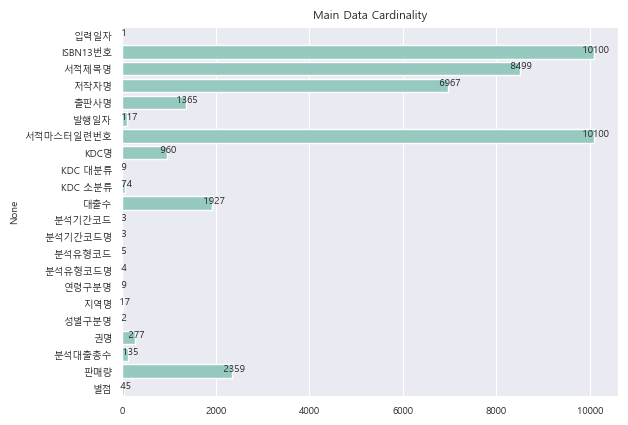

In [25]:
# 카디널리티

g = sns.barplot(
    y = Top_Lib.nunique()[2:].index ,
    x = Top_Lib.nunique()[2:].values
)

# 숫자 표시
for p in g.patches:
    g.text(
        p.get_x() + p.get_width() ,
        p.get_y() + (p.get_height() / 2) ,
        f"{p.get_width() : .0f}" ,
        ha = 'center'
    )

g.set_title('Main Data Cardinality')
plt.show()

데이터 수치 확인


In [26]:
### 2. 데이터 수치 살펴보기
Top_Lib.describe().style.background_gradient(cmap='pink_r')

,일련번호,순위수,입력일자,ISBN13번호,서적마스터일련번호,KDC명,대출수,분석유형코드,분석대출총수,판매량,별점
count,154064.000000,154064.000000,154064,154064.000000,154064.000000,154064.000000,154064.000000,154064.000000,154064.000000,154064.000000,154064.000000
mean,309329363.601211,459.655026,2021-12-15 00:00:00,9789627370446.691406,4496955.419955,671.883483,92.503849,3.697405,861902.888358,11208.749377,9.090588
min,309233497.000000,1.000000,2021-12-15 00:00:00,1727101922213.000000,117085.000000,11.300000,1.000000,1.000000,4897.000000,0.000000,0.000000
25%,309282120.750000,228.000000,2021-12-15 00:00:00,9788945221131.250000,3238806.000000,410.000000,12.000000,3.000000,104014.000000,264.000000,9.200000
50%,309330466.500000,452.000000,2021-12-15 00:00:00,9788964963932.500000,5407572.000000,813.700000,32.000000,4.000000,302252.000000,2076.000000,9.600000
75%,309376647.250000,679.000000,2021-12-15 00:00:00,9791164130009.000000,5824105.000000,833.600000,81.000000,5.000000,723129.000000,7269.000000,9.700000
max,309422496.000000,1000.000000,2021-12-15 00:00:00,9791197522901.000000,6355492.000000,999.000000,8389.000000,5.000000,24739757.000000,410166.000000,10.000000
std,54685.900048,272.195456,nan,31580198268.066364,1536253.635700,239.065135,225.451991,1.084807,2133968.857224,32015.850311,1.874860


<Axes: >

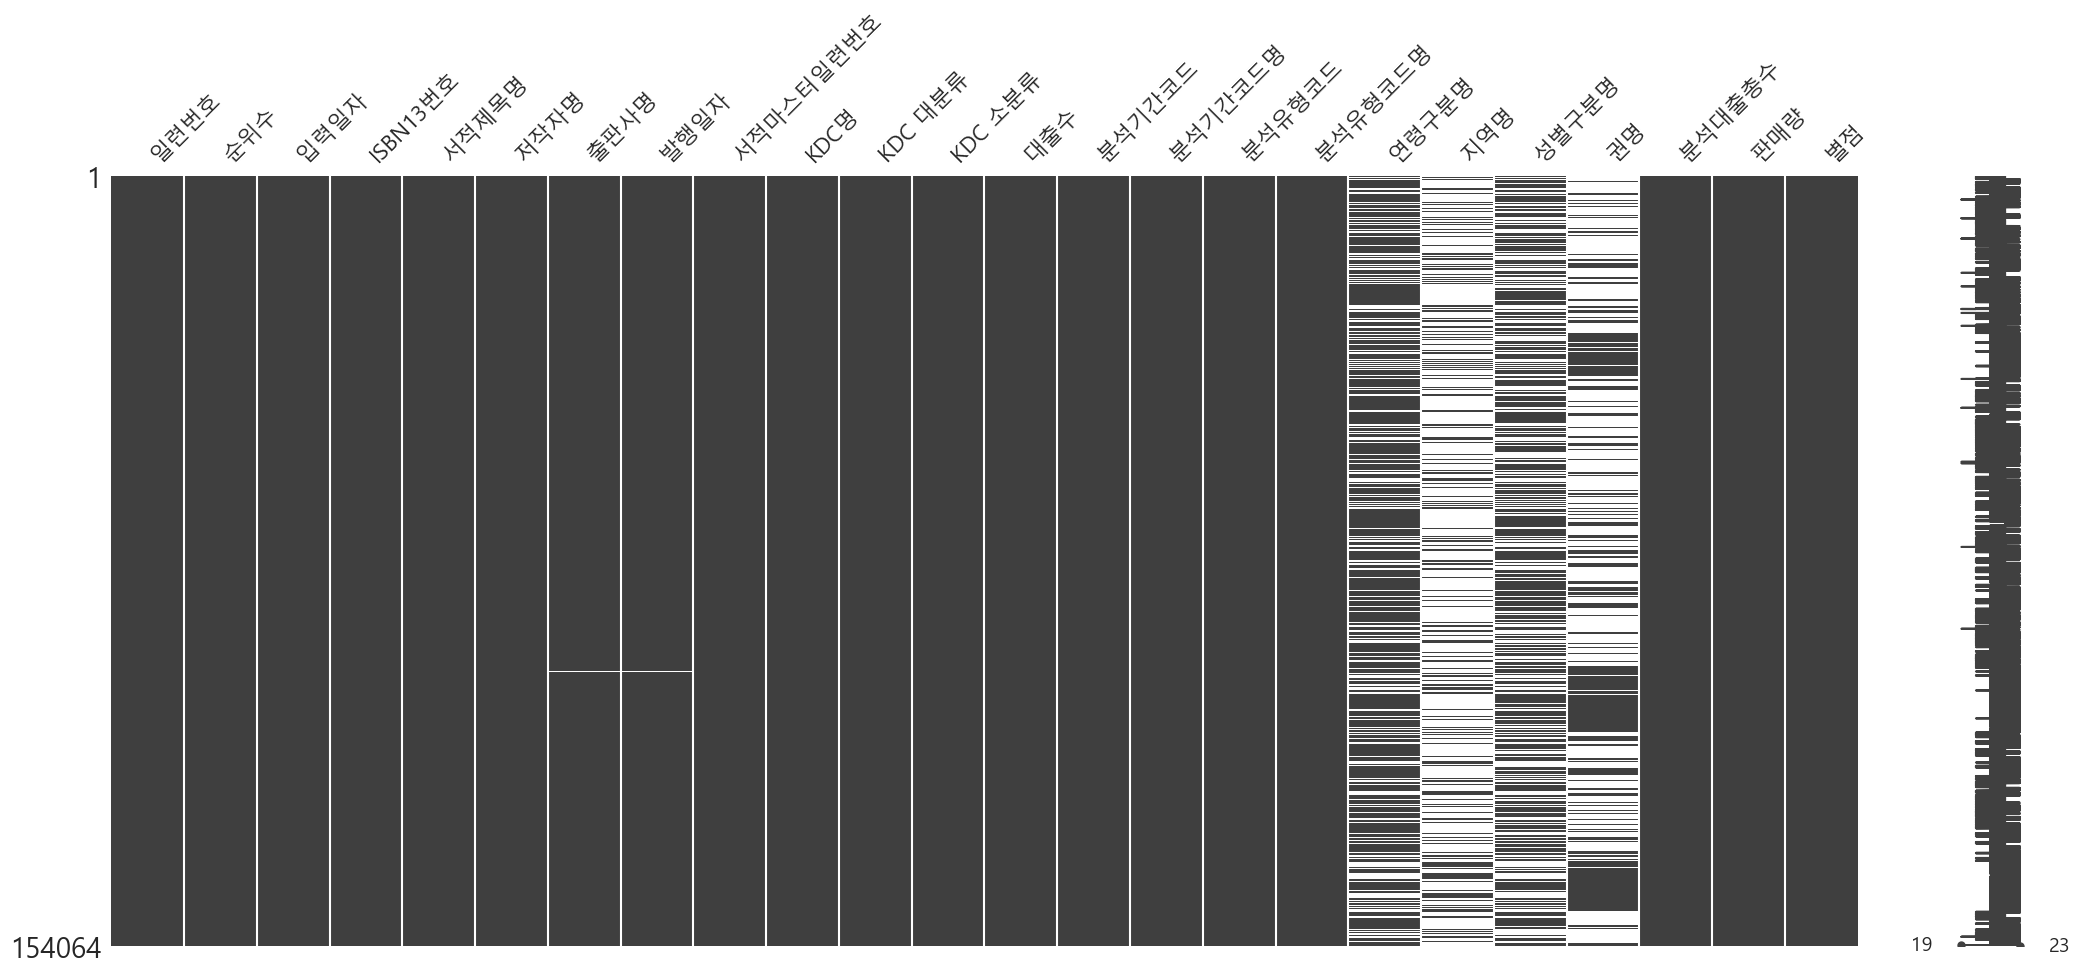

In [27]:
# 결측값 시각화

"""결측값을 확인결과 소재지지번주소, cctv설치대수, 보호구역도로 폭 등 결측값 존재"""
msno.matrix(Top_Lib)

In [28]:
# 결측값 퍼센트 확인
cols = ['일련번호','순위수','입력일자','ISBN13번호','서적제목명','저작자명','출판사명','발행일자','서적마스터일련번호','KDC명','KDC 대분류','KDC 소분류','대출수','분석기간코드','분석기간코드명','분석유형코드','분석유형코드명','연령구분명','지역명','성별구분명','권명','분석대출총수','판매량','별점']

print("----------------------국립중앙도서관 인기 대출 컬럼----------------------")
for col in cols:  
    print(f"column : {col} Nan value percentage : {round(Top_Lib[col].isna().sum() / len(Top_Lib) * 100 , 2)}%")



print("")

----------------------국립중앙도서관 인기 대출 컬럼----------------------
column : 일련번호 Nan value percentage : 0.0%
column : 순위수 Nan value percentage : 0.0%
column : 입력일자 Nan value percentage : 0.0%
column : ISBN13번호 Nan value percentage : 0.0%
column : 서적제목명 Nan value percentage : 0.0%
column : 저작자명 Nan value percentage : 0.0%
column : 출판사명 Nan value percentage : 0.34%
column : 발행일자 Nan value percentage : 0.28%
column : 서적마스터일련번호 Nan value percentage : 0.0%
column : KDC명 Nan value percentage : 0.0%
column : KDC 대분류 Nan value percentage : 0.0%
column : KDC 소분류 Nan value percentage : 0.0%
column : 대출수 Nan value percentage : 0.0%
column : 분석기간코드 Nan value percentage : 0.0%
column : 분석기간코드명 Nan value percentage : 0.0%
column : 분석유형코드 Nan value percentage : 0.0%
column : 분석유형코드명 Nan value percentage : 0.0%
column : 연령구분명 Nan value percentage : 27.06%
column : 지역명 Nan value percentage : 74.44%
column : 성별구분명 Nan value percentage : 41.73%
column : 권명 Nan value percentage : 59.66%
column : 분석대출총수 Nan valu

In [29]:
# 일단 분석을 중점으로 작성함 
# 결측치가 좀 큼....

# column : 연령구분명 Nan value percentage : 27.06%
# column : 성별구분명 Nan value percentage : 41.73%

# null 값을 미분류 값으로 변경 
Top_Lib['성별구분명'] = Top_Lib['성별구분명'].fillna('미분류')

# null 값을 미분류 값으로 변경 
Top_Lib['연령구분명'] = Top_Lib['연령구분명'].fillna('미분류')

# null 값을 미분류 값으로 변경 
Top_Lib['지역명'] = Top_Lib['지역명'].fillna('미분류')

# 데이터 확인 결과 ISBN13번호 컬럼의 뒤에 공백이 붙어있음
Top_Lib['ISBN13번호'] = Top_Lib['ISBN13번호'].replace(" " , "")


In [30]:
# 미분류로 변경한 데이터 다시 확인
cols = ['일련번호','순위수','입력일자','ISBN13번호','서적제목명','저작자명','출판사명','발행일자','서적마스터일련번호','KDC명','KDC 대분류','KDC 소분류','대출수','분석기간코드','분석기간코드명','분석유형코드','분석유형코드명','연령구분명','지역명','성별구분명','권명','분석대출총수','판매량','별점']

print("----------------------국립중앙도서관 인기 대출 컬럼----------------------")
for col in cols:  
    print(f"column : {col} Nan value percentage : {round(Top_Lib[col].isna().sum() / len(Top_Lib) * 100 , 2)}%")



print("")

----------------------국립중앙도서관 인기 대출 컬럼----------------------
column : 일련번호 Nan value percentage : 0.0%
column : 순위수 Nan value percentage : 0.0%
column : 입력일자 Nan value percentage : 0.0%
column : ISBN13번호 Nan value percentage : 0.0%
column : 서적제목명 Nan value percentage : 0.0%
column : 저작자명 Nan value percentage : 0.0%
column : 출판사명 Nan value percentage : 0.34%
column : 발행일자 Nan value percentage : 0.28%
column : 서적마스터일련번호 Nan value percentage : 0.0%
column : KDC명 Nan value percentage : 0.0%
column : KDC 대분류 Nan value percentage : 0.0%
column : KDC 소분류 Nan value percentage : 0.0%
column : 대출수 Nan value percentage : 0.0%
column : 분석기간코드 Nan value percentage : 0.0%
column : 분석기간코드명 Nan value percentage : 0.0%
column : 분석유형코드 Nan value percentage : 0.0%
column : 분석유형코드명 Nan value percentage : 0.0%
column : 연령구분명 Nan value percentage : 0.0%
column : 지역명 Nan value percentage : 0.0%
column : 성별구분명 Nan value percentage : 0.0%
column : 권명 Nan value percentage : 59.66%
column : 분석대출총수 Nan value perc

Text(0, 0.5, 'Columns')

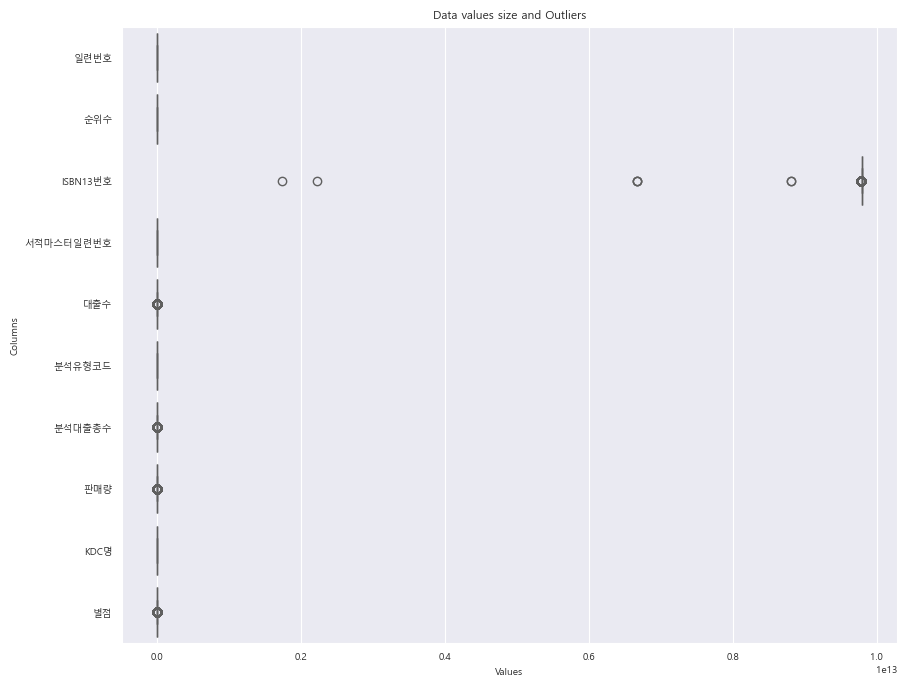

In [31]:
# 이상치 살펴보기

plt.figure(figsize = (10 , 8))

data = pd.concat([Top_Lib.select_dtypes('int') , Top_Lib.select_dtypes('float')] , axis = 1)

sns.boxplot(data = data , orient = 'h')
plt.title('Data values size and Outliers')
plt.xlabel('Values')
plt.ylabel('Columns')

##### 1.0 KDC 대분류 → 순위별

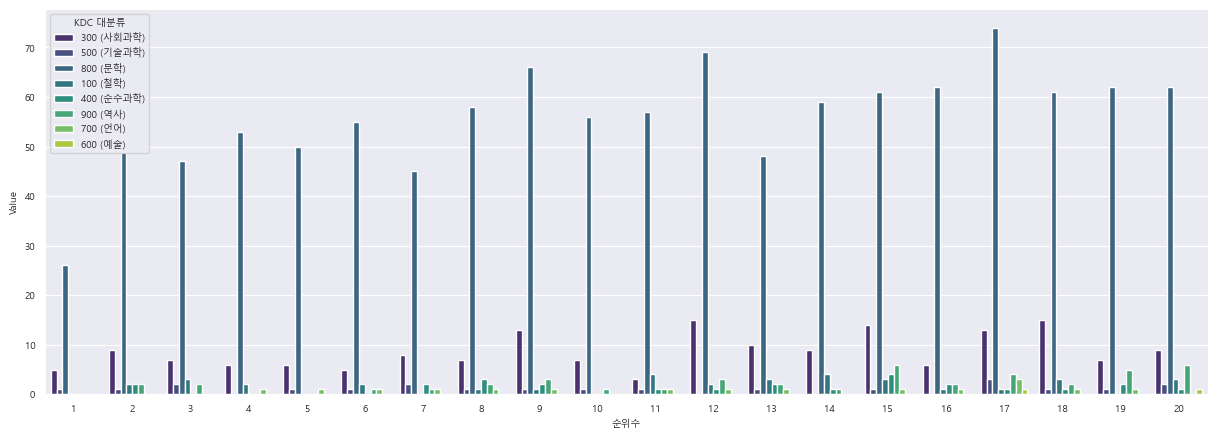

In [32]:

# 순위가 1등부터 20등까지의 데이터 필터링
Top_Lib_top20 = Top_Lib[Top_Lib['순위수'].between(1, 20)]

# 도서 서적 제목이 동일한 경우는 group 으로 묶어 계산
Group_Top20 = Top_Lib_top20.groupby(['순위수', '입력일자', 'ISBN13번호', '서적제목명', '출판사명', '발행일자','KDC명','KDC 대분류','KDC 소분류'])['대출수'].sum().reset_index()


# 대분류별 빈도수 계산
KDC_Class = Group_Top20.groupby([Group_Top20['순위수'].astype('int'), Group_Top20['KDC 대분류']]).size()

df = pd.DataFrame(list(KDC_Class.items()), columns=['Ranking', 'Value'])
df[['순위수', 'KDC 대분류']] = pd.DataFrame(df['Ranking'].tolist(), index=df.index)

plt.figure(figsize=(15, 5))
sns.barplot(x='순위수', y='Value', hue='KDC 대분류', data=df, palette='viridis')



plt.show()

##### 1.0.1 KDC 대분류 → 순위별 PIE 차트 대분류 % 확인

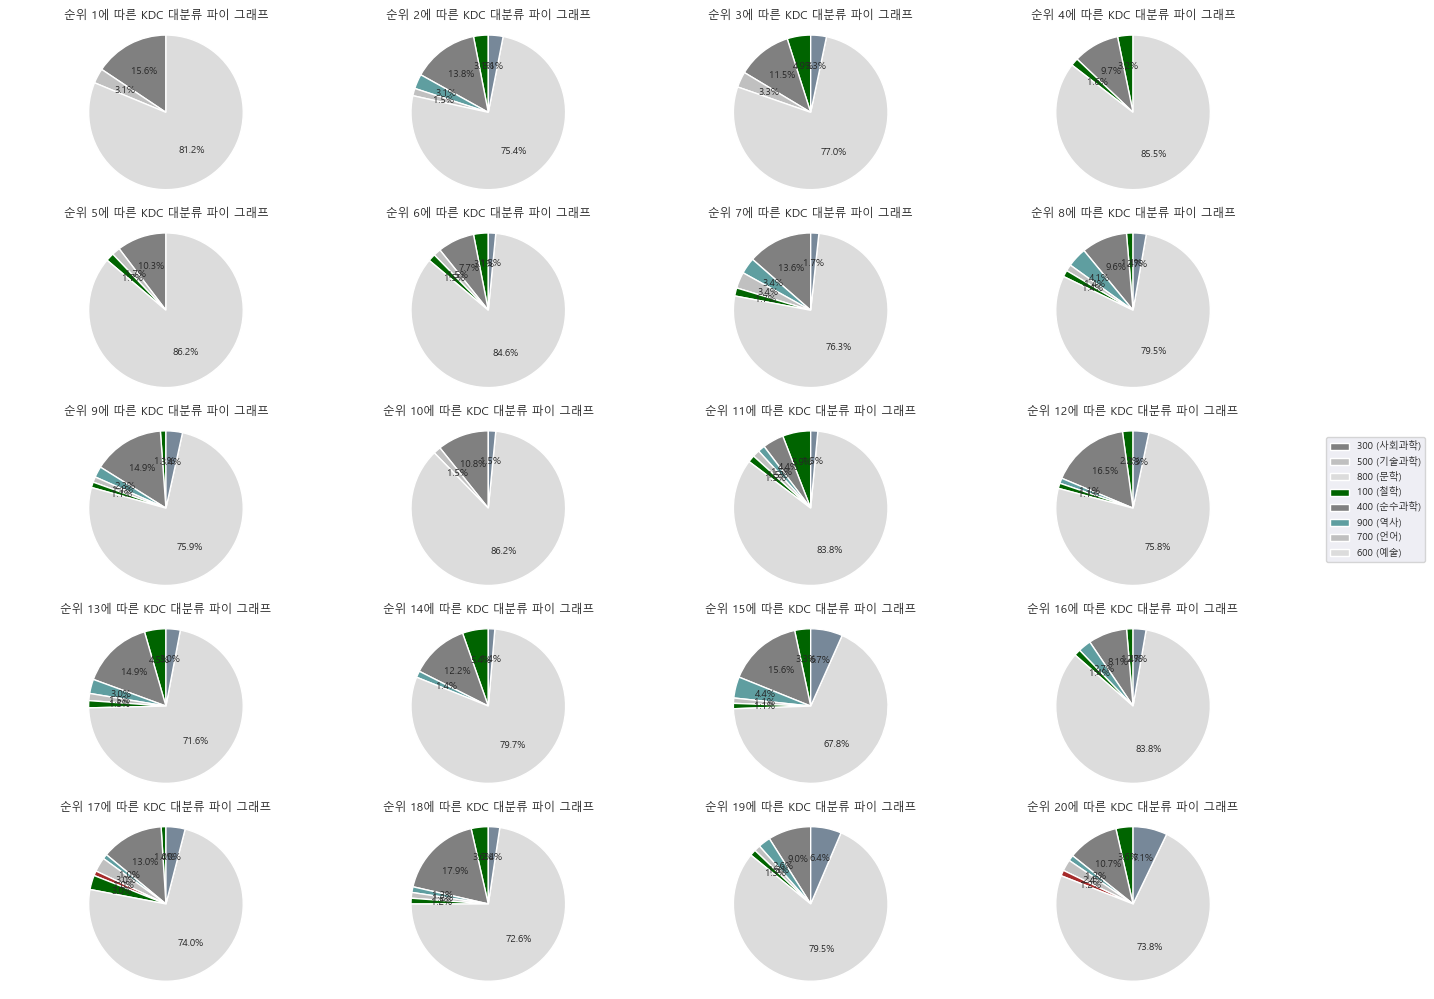

In [33]:

# 순위가 1등부터 20등까지의 데이터 필터링
Top_Lib_top20 = Top_Lib[Top_Lib['순위수'].between(1, 20)]

# 도서 서적 제목이 동일한 경우는 group 으로 묶어 계산
Group_Top20 = Top_Lib_top20.groupby(['순위수', '입력일자', 'ISBN13번호', '서적제목명', '출판사명', '발행일자','KDC명','KDC 대분류','KDC 소분류'])['대출수'].sum().reset_index()

# 대분류별 빈도수 계산
KDC_Class_F = Group_Top20.groupby(['순위수', 'KDC 대분류']).size().reset_index(name='Value')

# 사이즈 
fig, axes = plt.subplots(5, 4, figsize=(13, 10), subplot_kw=dict(aspect="equal"))
plt.rcParams.update({'font.size': 7})

# KDC 대분류에 대한 컬러 매핑
color_mapping = {
    '300 (사회과학)': 'gray',
    '500 (기술과학)': 'silver',
    '800 (문학)': 'gainsboro',
    '100 (철학)': 'darkgreen',
    '400 (순수과학)': 'cadetblue',
    '900 (역사)': 'lightslategray',
    '700 (언어)': 'darkgreen',
    '600 (예술)': 'brown'
}

# 각 순위에 대해 파이 그래프 생성
for ax, rank in zip(axes.flat, KDC_Class_F['순위수'].unique()):
    data = KDC_Class_F[KDC_Class_F['순위수'] == rank]
    
    # 각 순위별로 다른 색상을 지정
    colors = [color_mapping.get(category, 'gray') for category in data['KDC 대분류']]
    
    ax.pie(data['Value'], autopct='%1.1f%%', startangle=90, colors=colors)
    ax.axis('equal')
    ax.set_title(f'순위 {rank}에 따른 KDC 대분류 파이 그래프')

# 범례 추가
fig.legend(KDC_Class_F['KDC 대분류'].unique(), loc='center right', bbox_to_anchor=(1.1, 0.5))
plt.subplots_adjust(right=0.85)  # 범례가 그래프와 겹치지 않도록 조절

plt.tight_layout()
plt.show()

##### 1.1 KDC 소분류 → 순위별

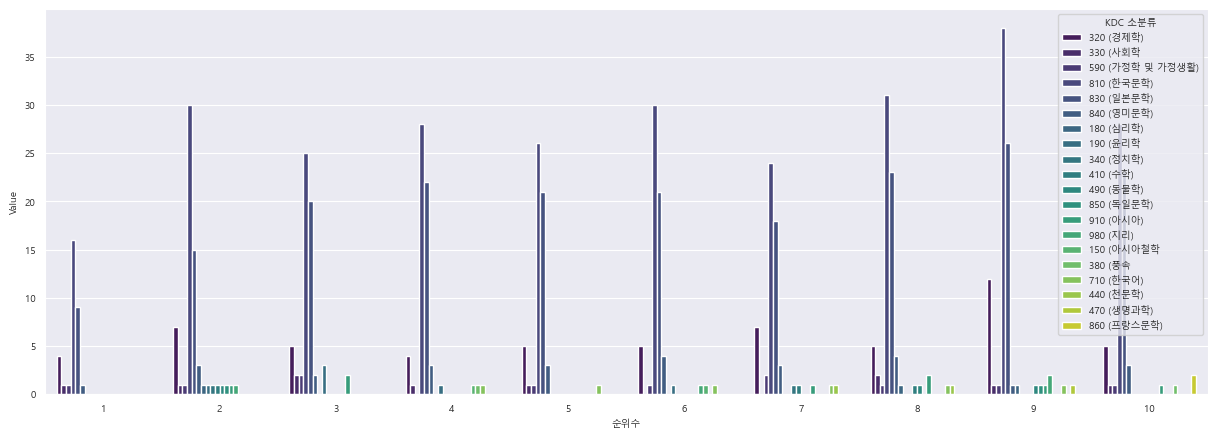

In [34]:

# 순위가 1등부터 10등까지의 데이터 필터링  ( 소분류는 항목이 많아 TOP10 까지만 추출 )
Top_Lib_top10 = Top_Lib[Top_Lib['순위수'].between(1, 10)]

# 도서 서적 제목이 동일한 경우는 group 으로 묶어 계산
Group_Top10 = Top_Lib_top10.groupby(['순위수', 'ISBN13번호', '서적제목명', '출판사명', '발행일자','KDC명','KDC 대분류','KDC 소분류'])['대출수'].sum().reset_index()


# 대분류별 빈도수 계산
KDC_Class_T = Group_Top10.groupby([Group_Top10['순위수'].astype('int'), Group_Top10['KDC 소분류']]).size()

df = pd.DataFrame(list(KDC_Class_T.items()), columns=['Ranking', 'Value'])
df[['순위수', 'KDC 소분류']] = pd.DataFrame(df['Ranking'].tolist(), index=df.index)

plt.figure(figsize=(15, 5))
sns.barplot(x='순위수', y='Value', hue='KDC 소분류', data=df, palette='viridis')

plt.show()

##### 1.1.1 KDC 소분류 → 순위별 PIE 차트 항목별 % 확인

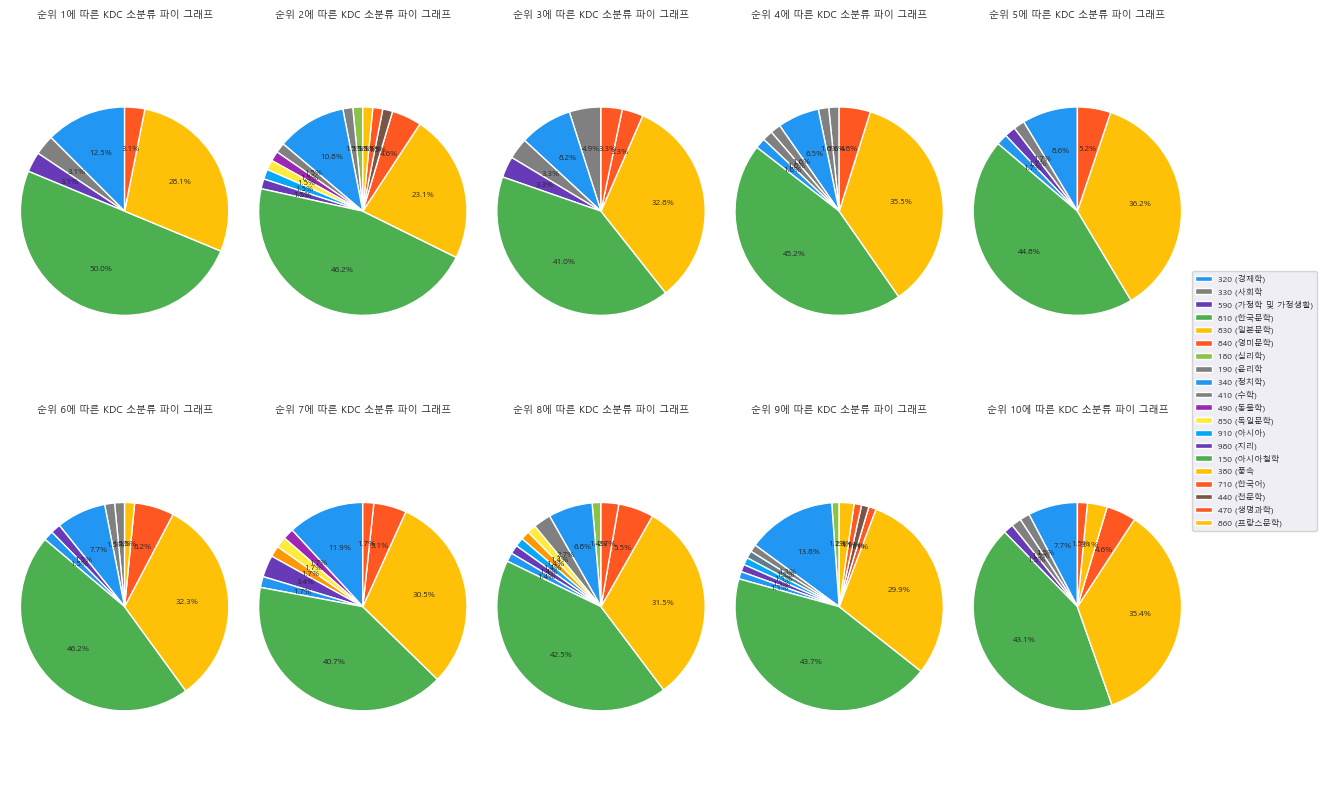

In [35]:

# 순위가 1등부터 10등까지의 데이터 필터링
Top_Lib_top10 = Top_Lib[Top_Lib['순위수'].between(1, 10)]

# 도서 서적 제목이 동일한 경우는 group 으로 묶어 계산
Group_Top10 = Top_Lib_top10.groupby(['순위수', 'ISBN13번호', '서적제목명', '출판사명', '발행일자','KDC명','KDC 대분류','KDC 소분류'])['대출수'].sum().reset_index()

# 대분류별 빈도수 계산
KDC_Class_T = Group_Top10.groupby(['순위수', 'KDC 소분류']).size().reset_index(name='Value')

# 사이즈 
fig, axes = plt.subplots(2, 5, figsize=(12, 8), subplot_kw=dict(aspect="equal"))
plt.rcParams.update({'font.size': 6})

# KDC 대분류에 대한 컬러 매핑
color_mapping = {
    '810 (한국문학)': '#4CAF50',  # Green
    '320 (경제학)': '#2196F3',  # Blue
    '830 (일본문학)': '#FFC107',  # Yellow
    '840 (영미문학)': '#FF5722',  # Deep Orange
    '590 (가정학 및 가정생활)': '#673AB7',  # Deep Purple
    '330 (사회학)': '#FF9800',  # Orange
    '850 (독일문학)': '#795548',  # Brown
    '190 (윤리학)': '#607D8B',  # Blue Grey
    '340 (정치학)': '#9C27B0',  # Purple
    '180 (심리학)': '#8BC34A',  # Light Green
    '490 (동물학)': '#03A9F4',  # Light Blue
    '410 (수학)': '#FFEB3B',  # Yellow
    '980 (지리)': '#FFC107',  # Yellow
    '910 (아시아)': '#FF5722',  # Deep Orange
    '380 (풍속)': '#9E9E9E',  # Grey
    '710 (한국어)': '#2196F3',  # Blue
    '150 (아시아철학)': '#8BC34A',  # Light Green
    '440 (천문학)': '#FF9800',  # Orange
    '470 (생명과학)': '#607D8B',  # Blue Grey
    '860 (프랑스문학)': '#FFC107'  # Yellow
}

# 각 순위에 대해 파이 그래프 생성
for ax, rank in zip(axes.flat, KDC_Class_T['순위수'].unique()):
    data = KDC_Class_T[KDC_Class_T['순위수'] == rank]
    
    # 각 순위별로 다른 색상을 지정
    colors = [color_mapping.get(category, 'gray') for category in data['KDC 소분류']]
    
    ax.pie(data['Value'], autopct='%1.1f%%', startangle=90, colors=colors)
    ax.axis('equal')
    ax.set_title(f'순위 {rank}에 따른 KDC 소분류 파이 그래프')

# 범례 추가
fig.legend(KDC_Class_T['KDC 소분류'].unique(), loc='center right', bbox_to_anchor=(1.1, 0.5))
plt.subplots_adjust(right=0.85)  # 범례가 그래프와 겹치지 않도록 조절

plt.tight_layout()
plt.show()

##### 1.2 KDC 대분류 → 연령별

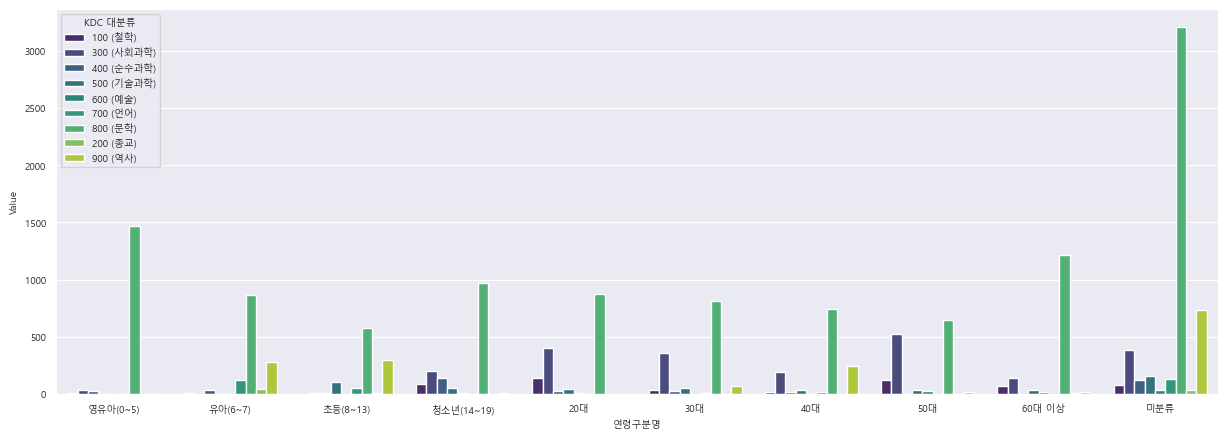

In [36]:
# 회의를 통해서 기준을 잡아야할듯.... 
Top_Lib_top100 = Top_Lib[Top_Lib['순위수'].between(1, 100)]

# 대분류별 빈도수 계산
AGE_KDC = Top_Lib_top100.groupby([Top_Lib_top100['연령구분명'], Top_Lib_top100['KDC 대분류']]).size()


# 연령별로 정렬
Age_orderby = ['영유아(0~5)','유아(6~7)', '초등(8~13)','청소년(14~19)','20대','30대','40대','50대','60대 이상','미분류']

df = pd.DataFrame(list(AGE_KDC.items()), columns=['Ranking', 'Value'])
df[['연령구분명', 'KDC 대분류']] = pd.DataFrame(df['Ranking'].tolist(), index=df.index)
df['연령구분명'] = pd.Categorical(df['연령구분명'], categories=Age_orderby, ordered=True)

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(15, 5))
sns.barplot(x='연령구분명', y='Value', hue='KDC 대분류', data=df, palette='viridis')

# 아래의 코드는 text count : 너무 정신없어서 주석처리
# ax = sns.barplot(x='연령구분명', y='Value', hue='KDC 대분류', data=df, palette='viridis')
#for p in ax.patches:
#    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

##### 1.2.1 KDC 소분류 → 연령별

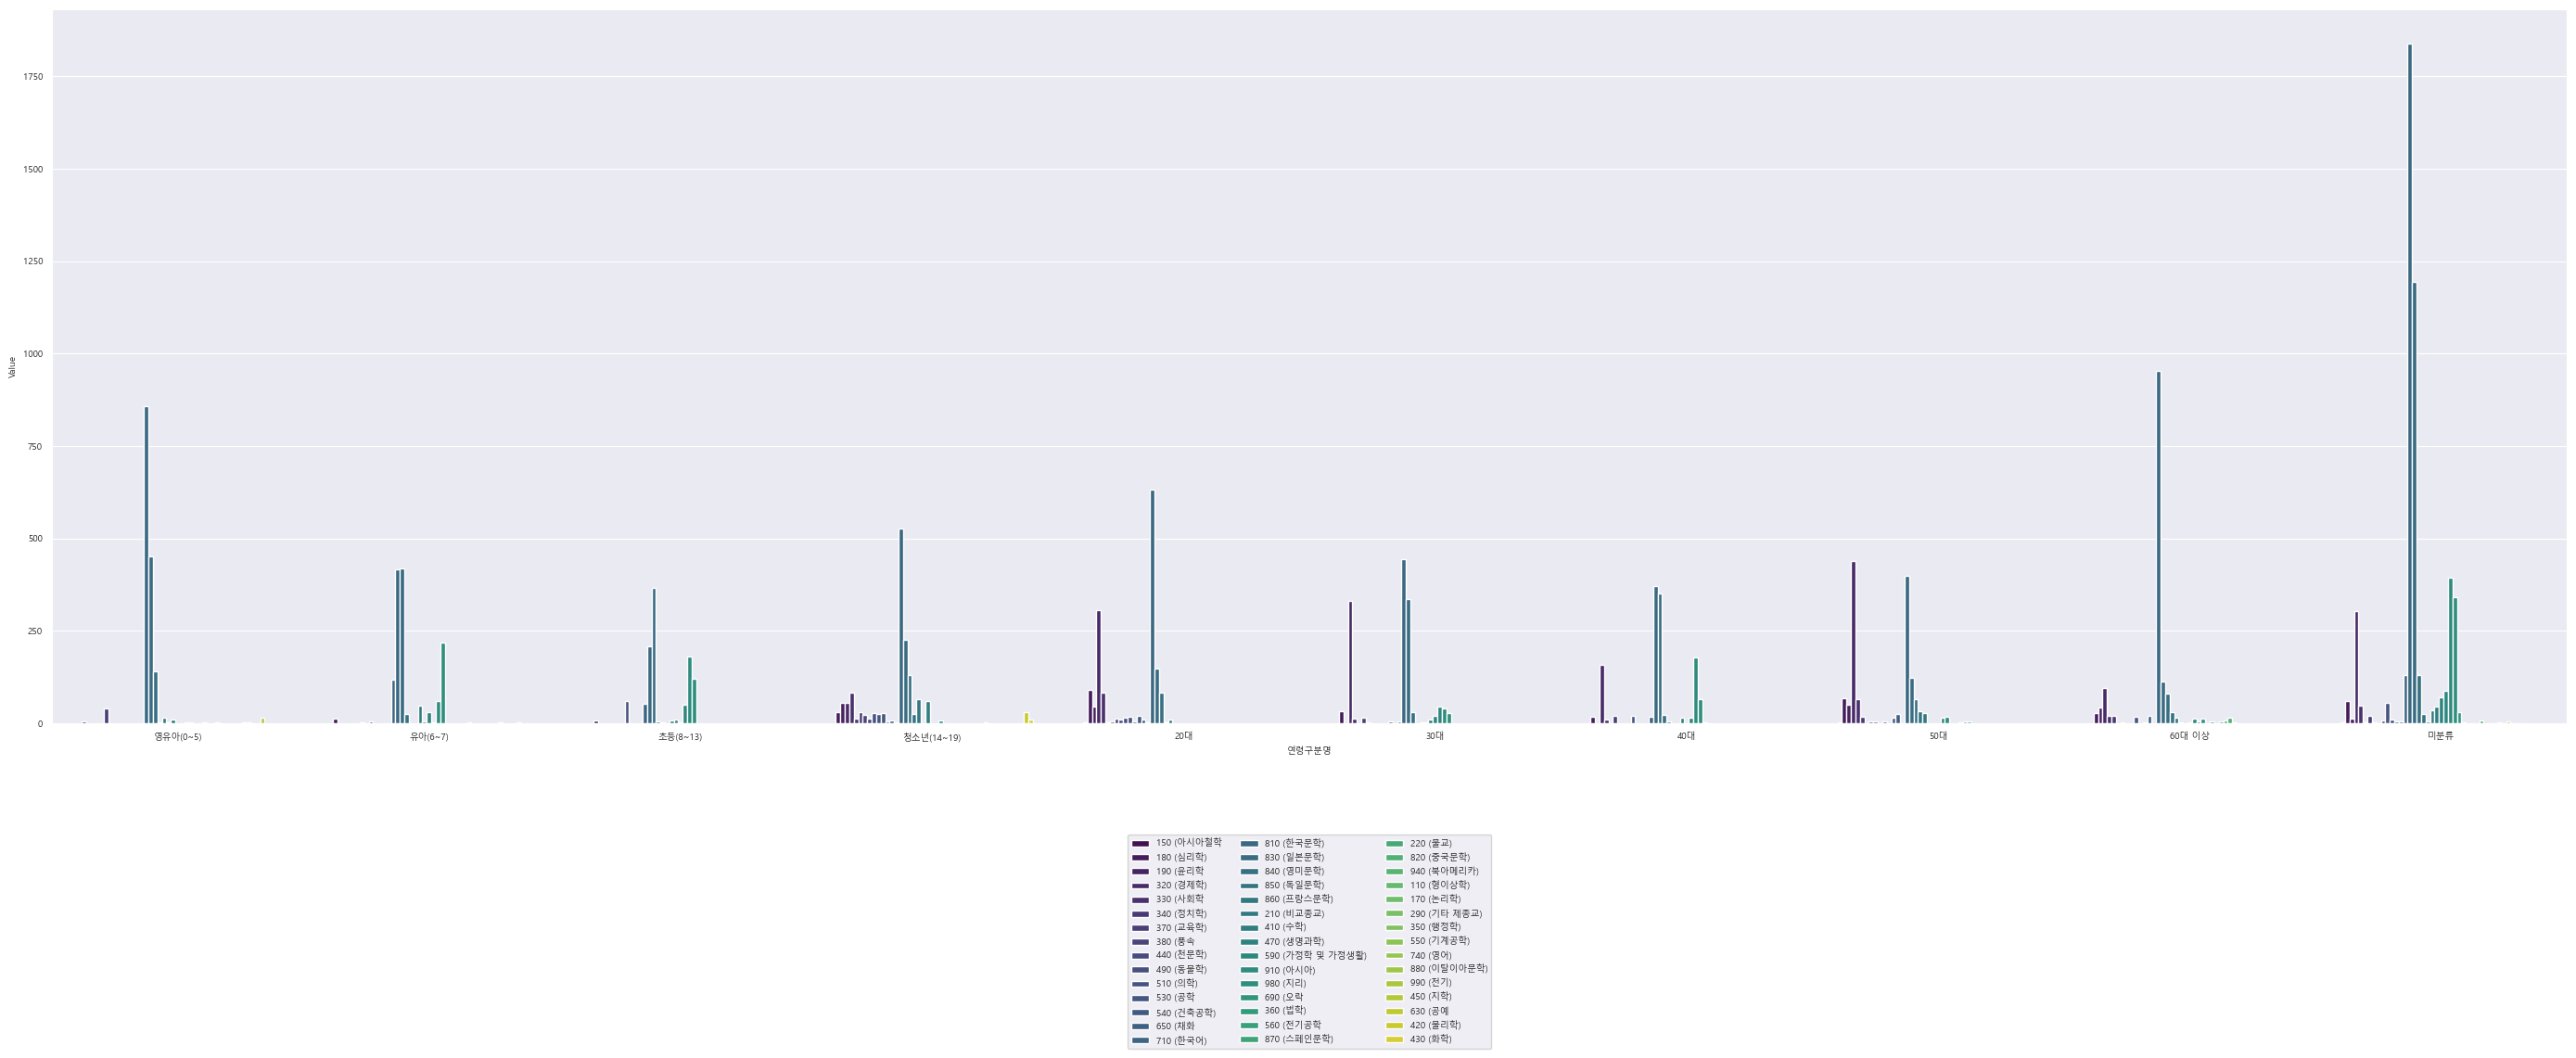

In [57]:
# 소분류구분으로 그래프를 추출하면 항목이 너무 많아 확인이 어려움 
# 해당 건은 회의를 통해 수정 필요
Top_Lib_top100 = Top_Lib[Top_Lib['순위수'].between(1, 100)]

# 대분류별 빈도수 계산
AGE_KDC = Top_Lib_top100.groupby([Top_Lib_top100['연령구분명'], Top_Lib_top100['KDC 소분류']]).size()


# 연령별로 정렬
Age_orderby =['영유아(0~5)','유아(6~7)', '초등(8~13)','청소년(14~19)','20대','30대','40대','50대','60대 이상','미분류']

df = pd.DataFrame(list(AGE_KDC.items()), columns=['Ranking', 'Value'])
df[['연령구분명', 'KDC 소분류']] = pd.DataFrame(df['Ranking'].tolist(), index=df.index)
df['연령구분명'] = pd.Categorical(df['연령구분명'], categories=Age_orderby, ordered=True)

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(35, 10))
ax = sns.barplot(x='연령구분명', y='Value', hue='KDC 소분류', data=df, palette='viridis')

# 범례 위치 조정 및 축소
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

##### 1.3 KDC 대분류 → 성별구분

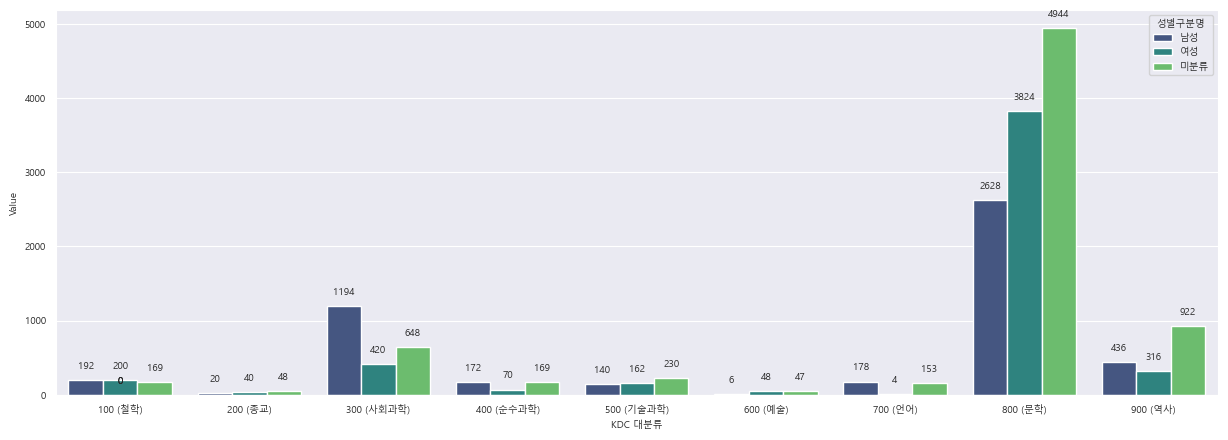

In [38]:
# 회의를 통해서 기준을 잡아야할듯.... 
Top_Lib_top100 = Top_Lib[Top_Lib['순위수'].between(1, 100)]

AGE_SEX = Top_Lib_top100.groupby(['KDC 대분류', '성별구분명']).size()

df = pd.DataFrame(list(AGE_SEX.items()), columns=['Ranking', 'Value'])
df[['KDC 대분류', '성별구분명']] = pd.DataFrame(df['Ranking'].tolist(), index=df.index)

df['KDC 대분류'] = pd.Categorical(df['KDC 대분류'])

Sex_Order = ['남성','여성','미분류']
df['성별구분명'] = pd.Categorical(df['성별구분명'], categories=Sex_Order, ordered=True)

df.sort_values(by='KDC 대분류', inplace=True)

plt.figure(figsize=(15, 5))
ax = sns.barplot(x='KDC 대분류', y='Value', hue='성별구분명', data=df, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


##### 1.3.1 KDC 소분류 → 성별구분

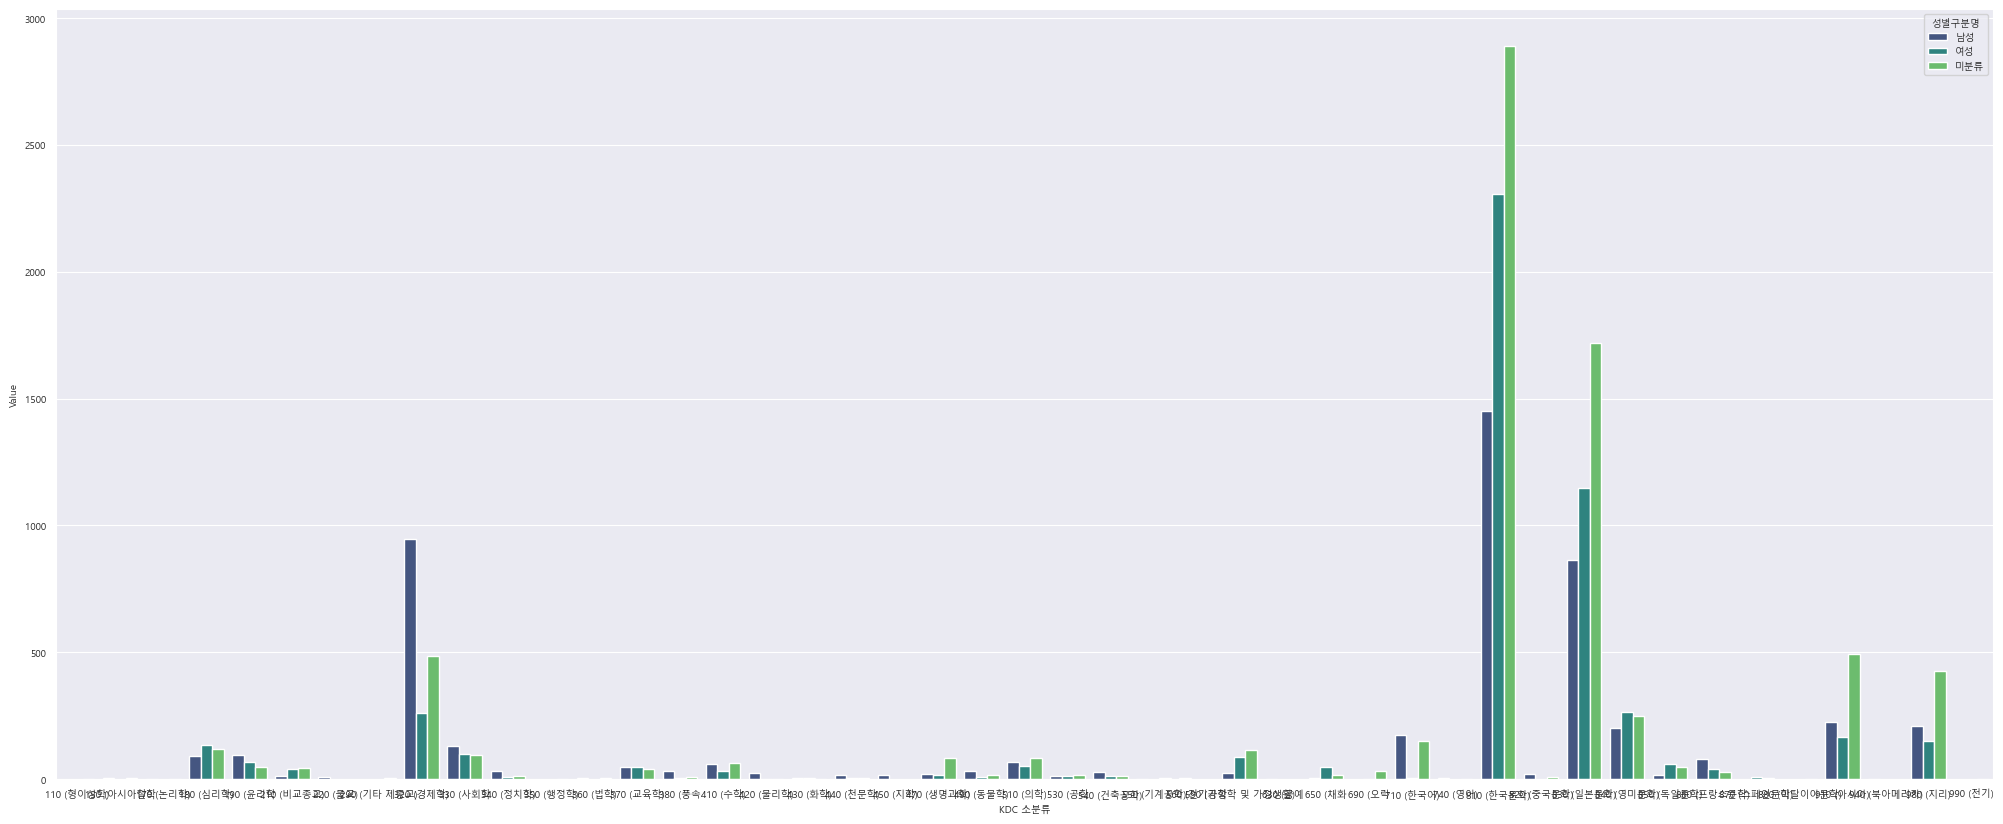

In [39]:
# 회의를 통해서 기준을 잡아야할듯.... 
Top_Lib_top100 = Top_Lib[Top_Lib['순위수'].between(1, 100)]

AGE_SEX = Top_Lib_top100.groupby(['KDC 소분류', '성별구분명']).size()

df = pd.DataFrame(list(AGE_SEX.items()), columns=['Ranking', 'Value'])
df[['KDC 소분류', '성별구분명']] = pd.DataFrame(df['Ranking'].tolist(), index=df.index)

df['KDC 소분류'] = pd.Categorical(df['KDC 소분류'])

Sex_Order = ['남성','여성','미분류']
df['성별구분명'] = pd.Categorical(df['성별구분명'], categories=Sex_Order, ordered=True)

df.sort_values(by='KDC 소분류', inplace=True)

plt.figure(figsize=(25, 10))
# 사이즈 조절이 필요함
ax = sns.barplot(x='KDC 소분류', y='Value', hue='성별구분명', data=df, palette='viridis')


plt.show()


##### 1.4 KDC 대분류 → 지역별

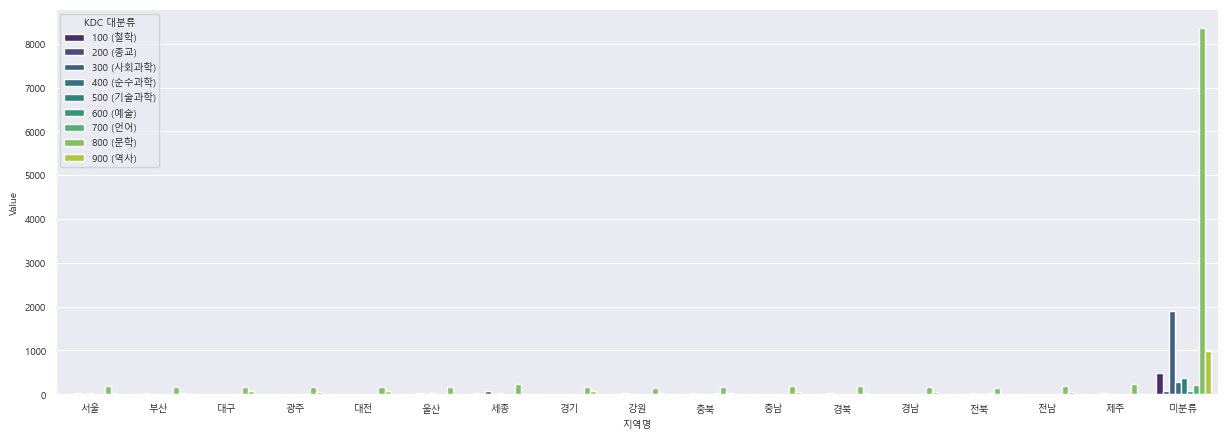

In [40]:
# 회의를 통해서 기준을 잡아야할듯.... 
Top_Lib_top100 = Top_Lib[Top_Lib['순위수'].between(1, 100)]

# 대분류별 빈도수 계산
AGE_KDC = Top_Lib_top100.groupby([Top_Lib_top100['지역명'], Top_Lib_top100['KDC 대분류']]).size()


# 자치단체 순번 order by 
SI_DO_orderby = ['서울','부산','대구','광주','대전','울산','세종','경기','강원','충북','충남','경북','경남','전북','전남','제주','미분류']

df = pd.DataFrame(list(AGE_KDC.items()), columns=['Ranking', 'Value'])
df[['지역명', 'KDC 대분류']] = pd.DataFrame(df['Ranking'].tolist(), index=df.index)
df['지역명'] = pd.Categorical(df['지역명'],categories=SI_DO_orderby, ordered=True)

plt.rcParams.update({'font.size': 7})
plt.figure(figsize=(15, 5))
sns.barplot(x='지역명', y='Value', hue='KDC 대분류', data=df, palette='viridis')

plt.show()

##### 1.5 KDC 대분류 → 판매량

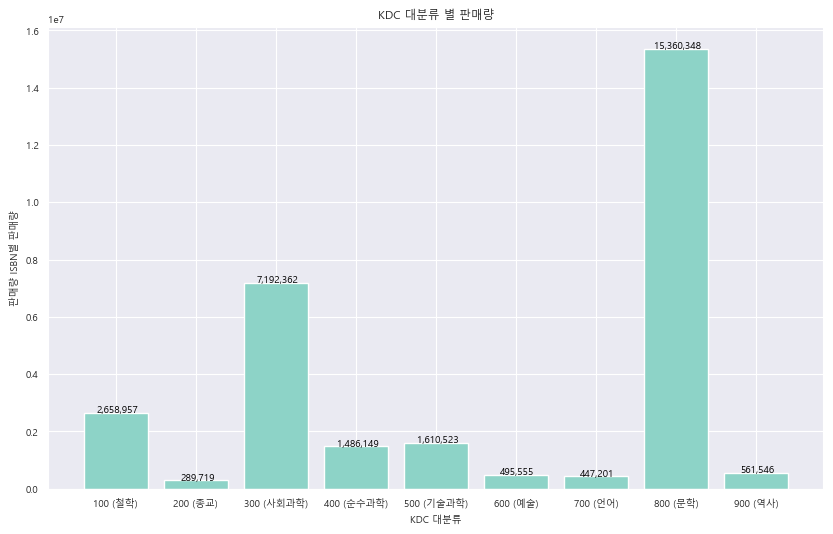

In [41]:
# 평점도 폭 넓게 500등 정도? 회의를 통해서 기준을 잡아야할듯.... 
Top_Lib_top100 = Top_Lib[Top_Lib['순위수'].between(1, 500)]

# ISBN13번호가 동일한 경우 중앙값으로 계산하여 KDC 대분류 별 판매량 그래프 생성 median mean
grouped_data = Top_Lib_top100.groupby(['KDC 대분류', 'ISBN13번호'])['판매량'].mean().reset_index()
kdc_grouped_data = grouped_data.groupby(['KDC 대분류'])['판매량'].sum().reset_index()

# 그래프 생성
plt.figure(figsize=(10, 6))
bars = plt.bar(kdc_grouped_data['KDC 대분류'], kdc_grouped_data['판매량'])
plt.xlabel('KDC 대분류')
plt.ylabel('판매량 ISBN별 판매량')
plt.title('KDC 대분류 별 판매량')

# 각 막대 위에 텍스트 추가
for bar, value in zip(bars, kdc_grouped_data['판매량']):
  plt.text(bar.get_x() + bar.get_width() / 1.9, bar.get_height() + 10, f"{value:,.0f}", ha='center', color='black', fontsize=7)

plt.show()

##### 1.6 KDC 대분류 → 별점

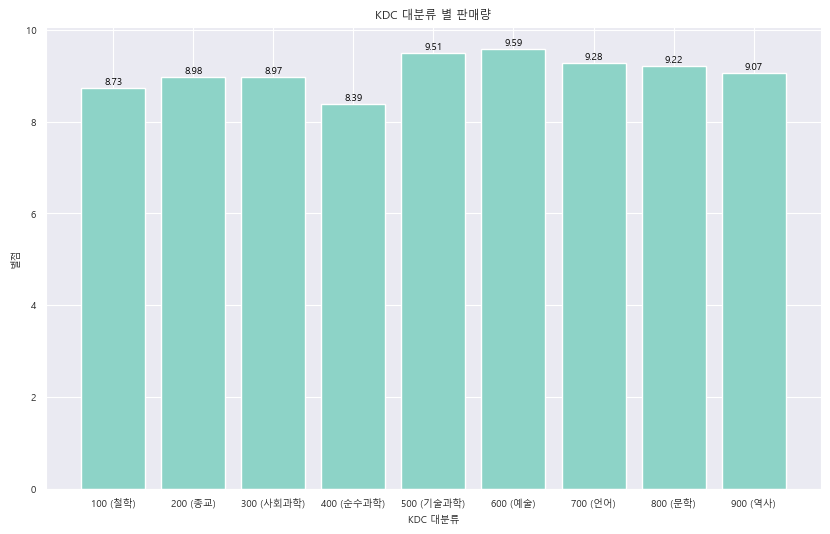

In [43]:
# 평점도 폭 넓게 500등 정도? 회의를 통해서 기준을 잡아야할듯....  
Top_Lib_top100 = Top_Lib[Top_Lib['순위수'].between(1, 100)]

# ISBN13번호가 동일한 경우 중앙값으로 계산하여 KDC 대분류 별 판매량 그래프 생성 median mean
grouped_data = Top_Lib_top100.groupby(['KDC 대분류', 'ISBN13번호'])['별점'].mean().reset_index()
kdc_grouped_data = grouped_data.groupby(['KDC 대분류'])['별점'].mean().reset_index()

# 그래프 생성
plt.figure(figsize=(10, 6))
bars = plt.bar(kdc_grouped_data['KDC 대분류'], kdc_grouped_data['별점'])
plt.xlabel('KDC 대분류')
plt.ylabel('별점')
plt.title('KDC 대분류 별 별점')

# 각 막대 위에 텍스트 추가  엑셀 파일로 검증 완료
for bar, value in zip(bars, kdc_grouped_data['별점']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.025, f"{value:.2f}", ha='center', va='bottom', color='black')

plt.show()

##### 1.7 상관분석


In [49]:
# Top_lib 데이터프레임에서 1만 건의 샘플 추출
# 1만건은 테스트하기 위해 데이터를 줄여봤음...
# sample_top_lib = Top_Lib.sample(n=10000, random_state=42)

# data count
Top_Lib.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154064 entries, 0 to 154063
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   일련번호       154064 non-null  int64         
 1   순위수        154064 non-null  int64         
 2   입력일자       154064 non-null  datetime64[ns]
 3   ISBN13번호   154064 non-null  int64         
 4   서적제목명      154064 non-null  object        
 5   저작자명       154059 non-null  object        
 6   출판사명       153533 non-null  object        
 7   발행일자       153640 non-null  object        
 8   서적마스터일련번호  154064 non-null  int64         
 9   KDC명       154064 non-null  float64       
 10  KDC 대분류    154064 non-null  object        
 11  KDC 소분류    154064 non-null  object        
 12  대출수        154064 non-null  int64         
 13  분석기간코드     154064 non-null  object        
 14  분석기간코드명    154064 non-null  object        
 15  분석유형코드     154064 non-null  int64         
 16  분석유형코드명    154064 no

In [58]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# 회의를 통해 어떤 컬럼을 제거할지 고민해야할듯..
# data = sample_top_lib.drop(['일련번호','입력일자','서적제목명','발행일자','저작자명','출판사명','KDC명','KDC 대분류','KDC 소분류','대출수','분석기간코드','분석기간코드명','분석유형코드','분석유형코드명','권명'] , axis = 1)
data = Top_Lib.drop(['일련번호','입력일자','서적제목명','발행일자','저작자명','출판사명','KDC 대분류','KDC 소분류','분석기간코드','분석기간코드명','분석유형코드','분석유형코드명','권명'] , axis = 1)

#data = sample_top_lib.drop(['입력일자','서적제목명','저작자명','출판사명','발행일자','대출수','분석기간코드','분석기간코드명','분석유형코드명','권명'] , axis = 1)


def cramers_V(var1 , var2):
    crosstab = np.array(pd.crosstab(var1 , var2 , rownames = None , colnames = None))
    stat = chi2_contingency(crosstab)[0]
    p_value = chi2_contingency(crosstab)[1]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape) - 1

    return np.sqrt(stat / (obs * mini)) , p_value


rows = []
p_rows = []
for var1 in data:
    cols = []
    p_cols = []
    for var2 in data:
        cramers , p_val = cramers_V(data[var1] , data[var2])
        cols.append(round(cramers , 2))
        p_cols.append(p_val)
    rows.append(cols)
    p_rows.append(p_cols)

cramers_result = np.array(rows)
cramer_df = pd.DataFrame(cramers_result , columns = data.columns , index = data.columns)

In [51]:
data

,순위수,ISBN13번호,서적마스터일련번호,KDC명,대출수,연령구분명,지역명,성별구분명,분석대출총수,판매량,별점
0,285,9791197522901,6049990,327.856,76,50대,미분류,남성,723129,1050,9.2
1,479,9791197522901,6049990,327.856,3,미분류,제주,미분류,29058,1050,9.2
2,251,9791197522901,6049990,327.856,7,50대,미분류,남성,55829,1050,9.2
3,519,9791197522901,6049990,327.856,20,50대,미분류,남성,240548,1050,9.2
4,678,9791197522901,6049990,327.856,16,60대 이상,미분류,남성,212456,1050,9.2
...,...,...,...,...,...,...,...,...,...,...,...
154059,630,6666666666666,5812624,688.600,6,유아(6~7),미분류,남성,57520,0,0.0
154060,342,6666666666666,5812624,688.600,11,미분류,대구,미분류,109410,0,0.0
154061,630,6666666666666,5812624,688.600,6,유아(6~7),미분류,남성,57520,0,0.0
154062,217,2222222222222,5812620,688.600,13,미분류,대구,미분류,109410,0,0.0


In [52]:
cramer_df

,순위수,ISBN13번호,서적마스터일련번호,KDC명,대출수,연령구분명,지역명,성별구분명,분석대출총수,판매량,별점
순위수,1.00,0.28,0.28,0.09,0.27,0.57,0.52,0.56,0.53,0.15,0.10
ISBN13번호,0.28,1.00,1.00,1.00,0.14,0.57,0.30,0.43,0.29,1.00,1.00
서적마스터일련번호,0.28,1.00,1.00,1.00,0.14,0.57,0.30,0.43,0.29,1.00,1.00
KDC명,0.09,1.00,1.00,1.00,0.06,0.32,0.11,0.23,0.12,0.55,0.35
대출수,0.27,0.14,0.14,0.06,1.00,0.24,0.19,0.22,0.25,0.10,0.09
연령구분명,0.57,0.57,0.57,0.32,0.24,1.00,0.32,0.51,1.00,0.33,0.17
지역명,0.52,0.30,0.30,0.11,0.19,0.32,1.00,0.49,1.00,0.13,0.04
성별구분명,0.56,0.43,0.43,0.23,0.22,0.51,0.49,1.00,1.00,0.23,0.08
분석대출총수,0.53,0.29,0.29,0.12,0.25,1.00,1.00,1.00,1.00,0.14,0.08
판매량,0.15,1.00,1.00,0.55,0.10,0.33,0.13,0.23,0.14,1.00,0.52


Text(0.5, 1.0, "Cramer's V correlation")

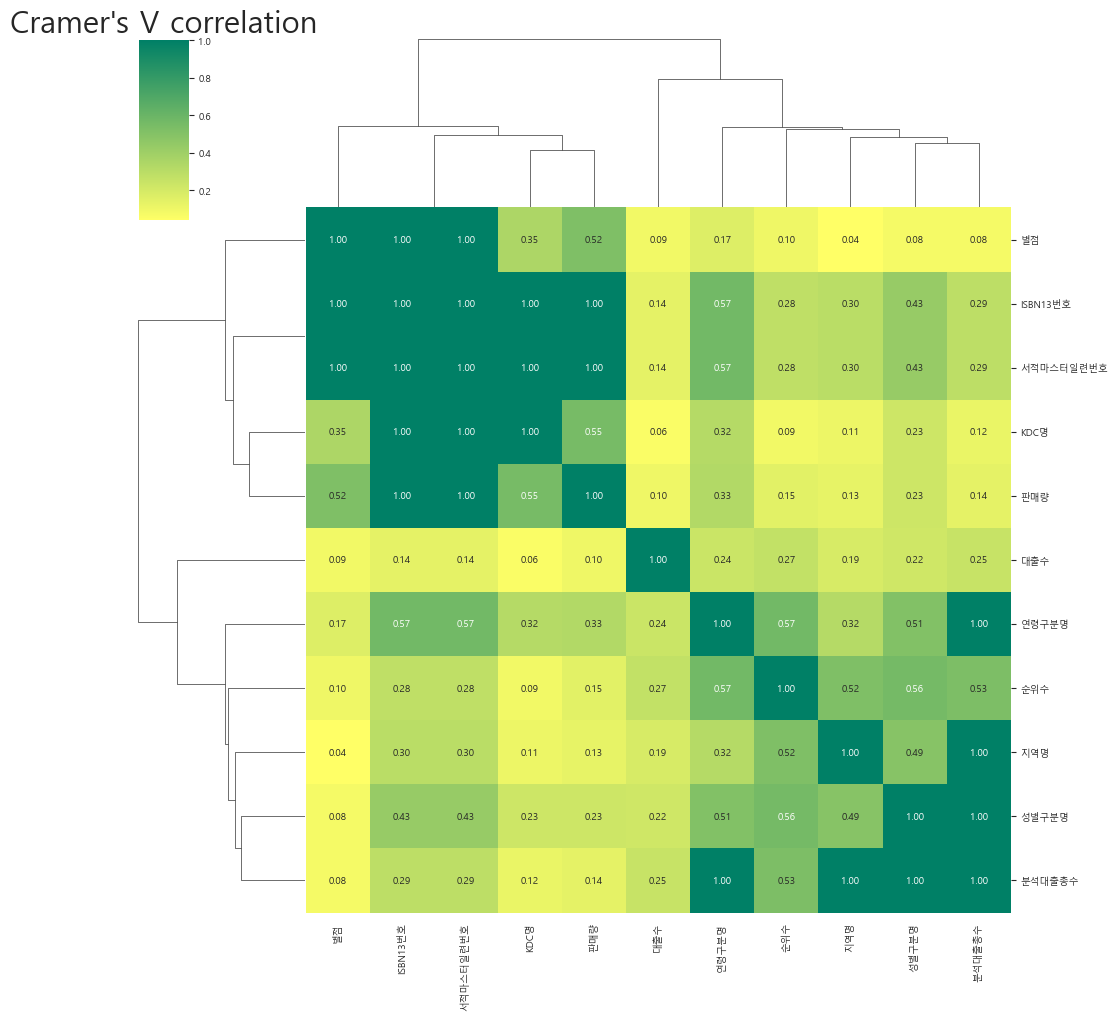

In [53]:
sns.clustermap(
    cramer_df ,
    annot = True ,
    fmt = '.2f' ,
    cmap = 'summer_r' 
    #linewidth = 0.1
)

plt.title("Cramer's V correlation" , fontsize = 22)

# plt.savefig("Cramer's V correlation.png")